In [1]:
#import basic libraries
import numpy as np
import pandas as pd

In [2]:
#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# for jupyter notebook widgets
#import ipywidgets as widgets
#from ipywidgets import interact
#from ipywidgets import interact_manual
# for Interactive Shells
from IPython.display import display
# setting up the chart size and background
plt.rcParams['figure.figsize'] = (16, 8)
plt.style.use('fivethirtyeight')

## Loading the dataset

In [4]:
#read dataset
data = pd.read_csv('movie_metadata.csv')

### Shape of data

In [5]:
#checking the shape of data
print(data.shape)

(5043, 28)


In [6]:
#columnwise information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [7]:
#view first 5 rows of data
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


## Impute missing values

In [8]:
#check rows with high percentage of missing values
round(100*(data.isnull().sum()/len(data.index)),2)

color                         0.38
director_name                 2.06
num_critic_for_reviews        0.99
duration                      0.30
director_facebook_likes       2.06
actor_3_facebook_likes        0.46
actor_2_name                  0.26
actor_1_facebook_likes        0.14
gross                        17.53
genres                        0.00
actor_1_name                  0.14
movie_title                   0.00
num_voted_users               0.00
cast_total_facebook_likes     0.00
actor_3_name                  0.46
facenumber_in_poster          0.26
plot_keywords                 3.03
movie_imdb_link               0.00
num_user_for_reviews          0.42
language                      0.24
country                       0.10
content_rating                6.01
budget                        9.76
title_year                    2.14
actor_2_facebook_likes        0.26
imdb_score                    0.00
aspect_ratio                  6.52
movie_facebook_likes          0.00
dtype: float64

In [9]:
#gross and budget have large number of NaN values, hence drop rows
data = data[~np.isnan(data['gross'])]
data = data[~np.isnan(data['budget'])]

In [10]:
#check again missing values columnwise
data.isnull().sum()

color                         2
director_name                 0
num_critic_for_reviews        1
duration                      1
director_facebook_likes       0
actor_3_facebook_likes       10
actor_2_name                  5
actor_1_facebook_likes        3
gross                         0
genres                        0
actor_1_name                  3
movie_title                   0
num_voted_users               0
cast_total_facebook_likes     0
actor_3_name                 10
facenumber_in_poster          6
plot_keywords                31
movie_imdb_link               0
num_user_for_reviews          0
language                      3
country                       0
content_rating               51
budget                        0
title_year                    0
actor_2_facebook_likes        5
imdb_score                    0
aspect_ratio                 75
movie_facebook_likes          0
dtype: int64

In [11]:
#retain rows for which sum of Null is less than two
data = data[data.isnull().sum(axis=1) <= 2]
data.isnull().sum()

color                         2
director_name                 0
num_critic_for_reviews        1
duration                      0
director_facebook_likes       0
actor_3_facebook_likes        4
actor_2_name                  0
actor_1_facebook_likes        0
gross                         0
genres                        0
actor_1_name                  0
movie_title                   0
num_voted_users               0
cast_total_facebook_likes     0
actor_3_name                  4
facenumber_in_poster          6
plot_keywords                24
movie_imdb_link               0
num_user_for_reviews          0
language                      3
country                       0
content_rating               41
budget                        0
title_year                    0
actor_2_facebook_likes        0
imdb_score                    0
aspect_ratio                 67
movie_facebook_likes          0
dtype: int64

In [12]:
#replace actor names with "Unknown" since cannot use 
#statistical values of actor names
data['actor_2_name'].fillna('Unknown Actor', inplace = True)
data['actor_3_name'].fillna('Unknown Actor', inplace = True)

In [13]:
data.isnull().sum().sum()

148

## Feature Engineering

In [14]:
#convert gross and budget from $ to Million $ to simplify analysis
data['gross'] = data['gross']/1000000
data['budget'] = data['budget']/1000000

#### Calculating Profit

In [15]:
#create profit column
data['Profit'] = data['gross'] - data['budget']

In [16]:
#check name of top 10 Profitable movies
data[['Profit','movie_title']].sort_values(by = 'Profit', ascending  = False).head(10)

,Profit,movie_title
0,523.505847,Avatar
29,502.177271,Jurassic World
26,458.672302,Titanic
3024,449.935665,Star Wars: Episode IV - A New Hope
3080,424.449459,E.T. the Extra-Terrestrial
794,403.279547,The Avengers
17,403.279547,The Avengers
509,377.783777,The Lion King
240,359.544677,Star Wars: Episode I - The Phantom Menace
66,348.316061,The Dark Knight


In [17]:
#lets the no. of rows before removing Duplicates
print("No. of Rows Before Removing Duplicates: ",data.shape[0])

No. of Rows Before Removing Duplicates:  3879


In [18]:
#remove all the duplicates from the data
data.drop_duplicates(subset = None, keep = 'first', inplace = True)

#print the no. of rows after removing Duplicates
print("No. of Rows After Removing Duplicates: ",data.shape[0])

No. of Rows After Removing Duplicates:  3845


#### Top 10 Movies with Highest Profit

In [19]:
data[['movie_title','Profit']].sort_values(by = 'Profit', ascending  = False).head(10)

,movie_title,Profit
0,Avatar,523.505847
29,Jurassic World,502.177271
26,Titanic,458.672302
3024,Star Wars: Episode IV - A New Hope,449.935665
3080,E.T. the Extra-Terrestrial,424.449459
17,The Avengers,403.279547
509,The Lion King,377.783777
240,Star Wars: Episode I - The Phantom Menace,359.544677
66,The Dark Knight,348.316061
439,The Hunger Games,329.999255


#### Manipulating the Duration and Language Column

In [20]:
#check values in the language column
data['language'].value_counts()

English       3664
French          37
Spanish         25
Mandarin        14
German          13
Japanese        12
Hindi           10
Cantonese        8
Italian          7
Korean           5
Portuguese       5
Norwegian        4
Thai             3
Danish           3
Dutch            3
Persian          3
Hebrew           2
Dari             2
Aboriginal       2
Indonesian       2
Swedish          1
None             1
Dzongkha         1
Romanian         1
Maya             1
Telugu           1
Czech            1
Kazakh           1
Icelandic        1
Bosnian          1
Arabic           1
Aramaic          1
Hungarian        1
Vietnamese       1
Mongolian        1
Russian          1
Zulu             1
Filipino         1
Name: language, dtype: int64

In [21]:
#keep two languages i.e English and foreign
def language(x):
    if x == 'English':
        return 'English'
    else:
        return 'Foreign'
    
#apply the function on the language column
data['language'] = data['language'].apply(language)

#chack values again
data['language'].value_counts()

English    3664
Foreign     181
Name: language, dtype: int64

In [22]:
#check the values in the Genres Column
data['genres'].value_counts()

Drama                                                153
Comedy|Drama|Romance                                 151
Comedy|Drama                                         146
Comedy                                               145
Comedy|Romance                                       136
                                                    ... 
Action|Comedy|Drama                                    1
Action|Fantasy|Romance|Sci-Fi                          1
Action|Adventure|Animation|Family|Fantasy              1
Animation|Biography|Documentary|Drama|History|War      1
Adventure|Comedy|Drama|Fantasy                         1
Name: genres, Length: 760, dtype: int64

In [23]:
data['genres'].str.split('|')[0]

['Action', 'Adventure', 'Fantasy', 'Sci-Fi']

In [24]:
#keep four genres
data['Moviegenres'] = data['genres'].str.split('|')
data['Genre1'] = data['Moviegenres'].apply(lambda x: x[0])

## Some of the movies have only one genre. 
#In such cases, assign the same genre to 'genre_2' as well
data['Genre2'] = data['Moviegenres'].apply(lambda x: x[1] if len(x) > 1 else x[0])

data['Genre3'] = data['Moviegenres'].apply(lambda x: x[2] if len(x) > 2 else x[0])

data['Genre4'] = data['Moviegenres'].apply(lambda x: x[3] if len(x) > 3 else x[0])

#check the head of the data
data[['genres','Genre1','Genre2','Genre3','Genre4']].head(5)

,genres,Genre1,Genre2,Genre3,Genre4
0,Action|Adventure|Fantasy|Sci-Fi,Action,Adventure,Fantasy,Sci-Fi
1,Action|Adventure|Fantasy,Action,Adventure,Fantasy,Action
2,Action|Adventure|Thriller,Action,Adventure,Thriller,Action
3,Action|Thriller,Action,Thriller,Action,Action
5,Action|Adventure|Sci-Fi,Action,Adventure,Sci-Fi,Action


## Data Visualisation

   index                          movie_title  Social_Media_Popularity
0     10  Batman v Superman: Dawn of Justice               1599.794424
1    150                        Ghostbusters               1076.336425
2   1582                        Ghostbusters               1075.827482
3     96                        Interstellar               1024.560802
4   3015               10 Days in a Madhouse                828.025478
5    945                      Into the Woods                692.937200
6     73                       Suicide Squad                652.816996
7   1190                Fifty Shades of Grey                624.306881
8    108                            Warcraft                622.790277
9     92        Independence Day: Resurgence                599.274128


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


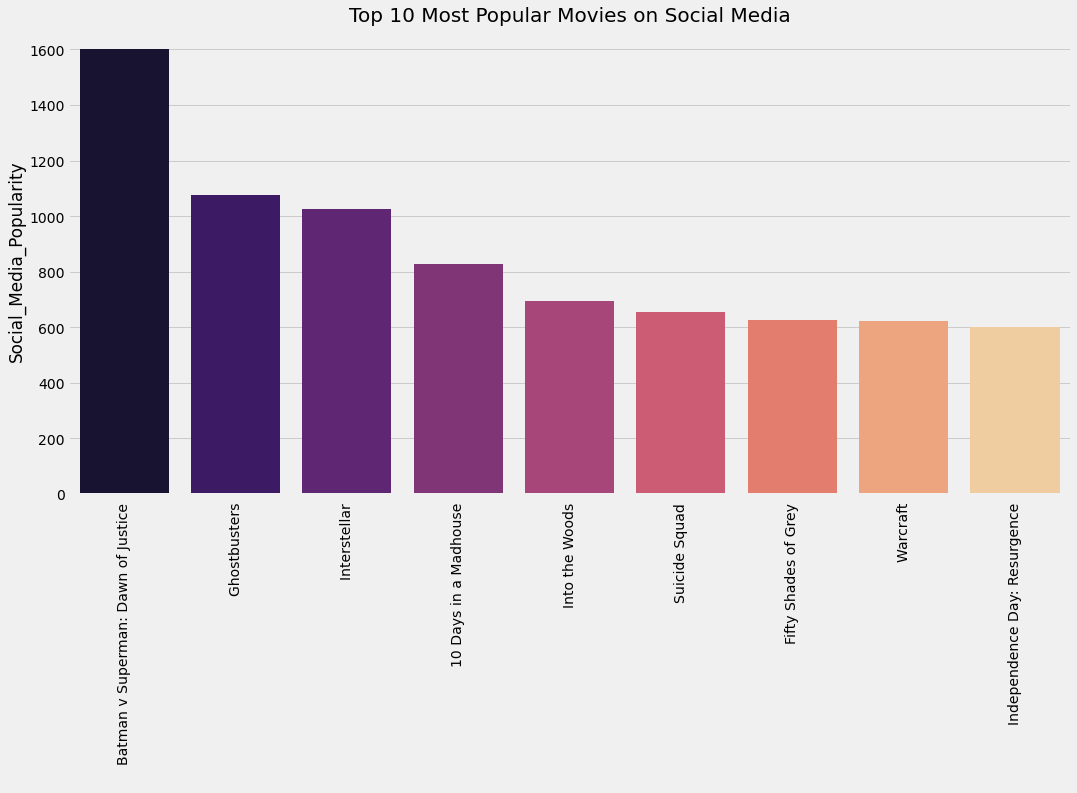

In [25]:
#Calculate Social media popularity
data['Social_Media_Popularity'] = (data['num_user_for_reviews']/data['num_voted_users'])*data['movie_facebook_likes']

#check the Top 10 Most Popular Movies on Social Media
x = data[['movie_title','Social_Media_Popularity']].sort_values(by = 
                                                                'Social_Media_Popularity',ascending = 
                                                                False).head(10).reset_index()

print(x)

sns.barplot(x['movie_title'], x['Social_Media_Popularity'], palette='magma')

plt.title('Top 10 Most Popular Movies on Social Media', fontsize = 20)
plt.xticks(rotation = 90, fontsize = 14)
plt.xlabel(' ')
plt.show()

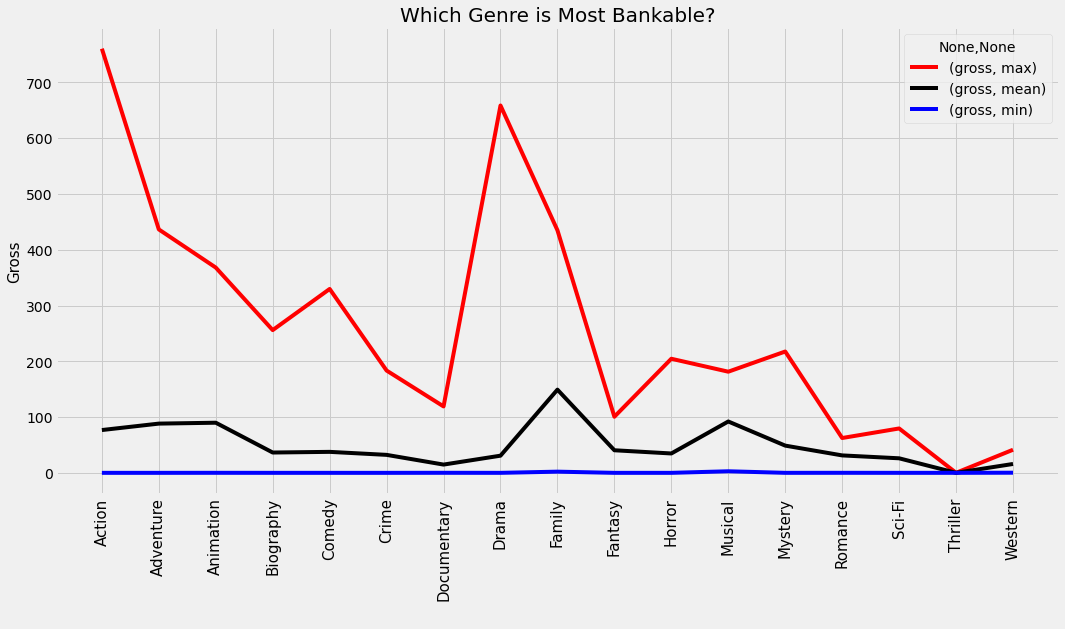

The Most Profitable Movie from each Genre


,Genre1,movie_title,gross
0,Action,Avatar,760.505847
509,Adventure,The Lion King,422.783777
521,Animation,Despicable Me 2,368.049635
1403,Biography,The Blind Side,255.950375
836,Comedy,Forrest Gump,329.691196
3466,Crime,The Godfather,134.821952
3583,Documentary,Fahrenheit 9/11,119.078393
26,Drama,Titanic,658.672302
3080,Family,E.T. the Extra-Terrestrial,434.949459
2485,Fantasy,The Others,96.471845


In [26]:
#compare the gross with genres
data[['Genre1','gross',]].groupby(['Genre1']).agg(['max','mean','min']).plot(kind = 'line', color = ['red','black','blue'])

plt.title('Which Genre is Most Bankable?', fontsize = 20)

plt.xticks(np.arange(17), ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime','Documentary', 'Drama', 'Family', 'Fantasy', 'Horror', 'Musical','Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'Western'], rotation = 90, fontsize = 15)

plt.ylabel('Gross', fontsize = 15)
plt.xlabel(' ',)
plt.show()

print('The Most Profitable Movie from each Genre')
display(data.loc[data.groupby(data['Genre1'])['Profit'].idxmax()][['Genre1','movie_title','gross']].style.background_gradient(cmap = 'copper'))

### Most Profitable Years in BOX Office

Most Profitable Years in Box Office


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


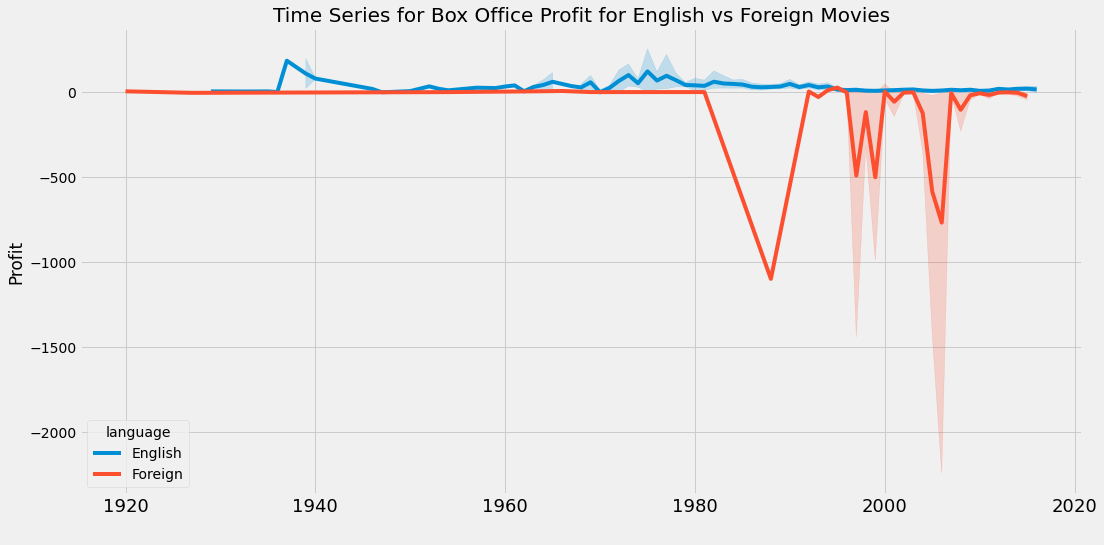

Movies that Made Huge Losses


,movie_title,language,Profit
2323,Princess Mononoke,Foreign,-2397.701809
2334,Steamboy,Foreign,-2127.109510
2988,The Host,Foreign,-12213.298588
3005,Fateless,Foreign,-2499.804112
3859,Lady Vengeance,Foreign,-4199.788333


In [27]:
data['title_year'] = data['title_year'].astype('int')

print('Most Profitable Years in Box Office')
display(data[['title_year','language','Profit']].groupby(['language','title_year']).agg('sum').sort_values(by = 'Profit',ascending = False).head(10).style.background_gradient(cmap = 'Greens'))

#plot them
sns.lineplot(data['title_year'], data['Profit'], hue = data['language'])


plt.title('Time Series for Box Office Profit for English vs Foreign Movies', fontsize = 20)
plt.xticks(fontsize = 18)
plt.xlabel(' ')
plt.show()


print("Movies that Made Huge Losses")
display(data[data['Profit'] < -2000][['movie_title','language','Profit']].style.background_gradient(cmap = 'Reds'))

### Movies That Made Huge Losses

,movie_title,duration,gross,Profit


,movie_title,duration,gross,Profit


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Gross Comparison')

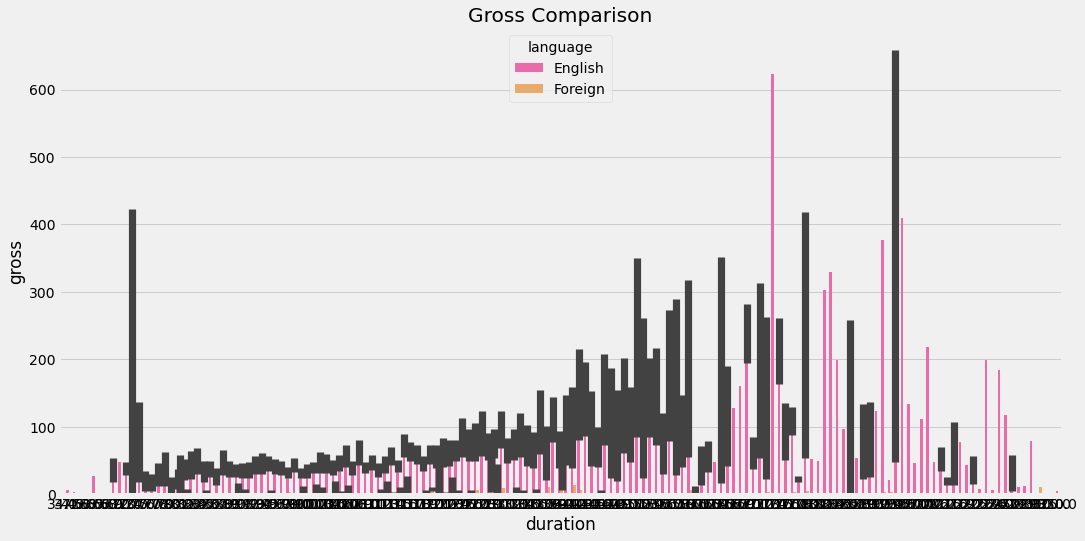

In [28]:
display(data[data['duration'] == 'Long'][['movie_title', 'duration', 'gross','Profit']].sort_values(by = 'Profit',ascending = False).head(5).style.background_gradient(cmap = 'spring'))

display(data[data['duration'] == 'Short'][['movie_title', 'duration', 'gross','Profit']].sort_values(by = 'Profit',ascending = False).head(5).style.background_gradient(cmap = 'spring'))

sns.barplot(data['duration'], data['gross'], hue = data['language'], palette = 'spring')

plt.title('Gross Comparison')

In [31]:
print("Average IMDB Score for Long Duration Movies is {0:.2f}".format(data[data['duration'] == 'Long']['imdb_score'].mean()))

print("Average IMDB Score for Short Duration Movies is {0:.2f}".format(data[data['duration'] == 'Short']['imdb_score'].mean()))

Average IMDB Score for Long Duration Movies is nan
Average IMDB Score for Short Duration Movies is nan


In [32]:
print("\nHighest Rated Long Duration Movie\n",data[data['duration'] == 'Long'][['movie_title','imdb_score']].sort_values(by = 'imdb_score', ascending = False).head(1))

print("\nHighest Rated Short Duration Movie\n",data[data['duration'] == 'Short'][['movie_title','imdb_score']].sort_values(by = 'imdb_score', ascending = False).head(1))


Highest Rated Long Duration Movie
 Empty DataFrame
Columns: [movie_title, imdb_score]
Index: []

Highest Rated Short Duration Movie
 Empty DataFrame
Columns: [movie_title, imdb_score]
Index: []
